In [1]:
import numpy as np 
import pandas as pd 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


from sklearn.metrics import f1_score

In [2]:
data = pd.read_csv('spam.csv',encoding = "latin-1")

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.drop([data.columns[col] for col in range(2,5)],axis=1,inplace=True)

In [5]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


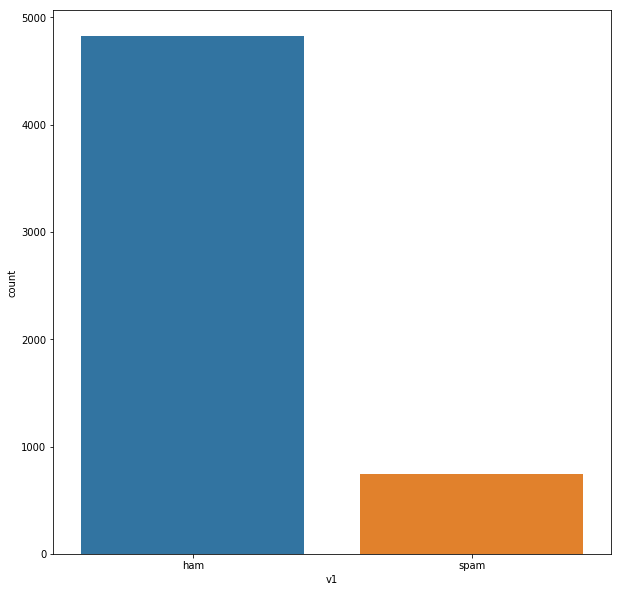

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,10))
sns.countplot(data = data, x= 'v1' )

In [8]:
encoder = LabelEncoder()
data['v1'] = encoder.fit_transform(data["v1"])

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)

In [10]:
y = data['v1']

In [11]:
data = data.drop('v1',axis = 1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data, y, train_size = 0.8)

In [14]:
X_tr_f = vect.fit_transform(X_train['v2'])
X_te_f = vect.transform(X_test['v2'])

In [15]:
print(X_tr_f)

  (0, 5993)	0.534795522789184
  (0, 3126)	0.25986442714484687
  (0, 3743)	0.355629662044263
  (0, 1347)	0.5098979171283244
  (0, 6104)	0.5098979171283244
  (1, 4090)	0.38083524225427784
  (1, 4196)	0.5643039978064722
  (1, 7316)	0.514112179301868
  (1, 3019)	0.5217414909802004
  (2, 3340)	0.24982920660634733
  (2, 2130)	0.3379994726123903
  (2, 5045)	0.26635013509094646
  (2, 1869)	0.341482911855584
  (2, 6558)	0.23694506181695105
  (2, 7226)	0.3287940858510007
  (2, 4507)	0.404734717336705
  (2, 4129)	0.22522575222648625
  (2, 5018)	0.3584713422257154
  (2, 7396)	0.3584713422257154
  (3, 2206)	0.39415122709790795
  (3, 7167)	0.3208940353440413
  (3, 5774)	0.517402500001535
  (3, 4066)	0.53597091705983
  (3, 6407)	0.4320898718045091
  (4, 4421)	0.434179577176649
  :	:
  (4453, 7272)	0.23448853417038226
  (4453, 7214)	0.2816257376976405
  (4453, 1892)	0.31934715574090605
  (4453, 337)	0.2513984868061401
  (4453, 387)	0.2981747886462834
  (4453, 671)	0.36211984925248897
  (4453, 6886)	0.

In [17]:
Log = LogisticRegression()
Log.fit(X_tr_f,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
sv = SVC()
sv.fit(X_tr_f,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [20]:
nn = MLPClassifier(hidden_layer_sizes=(128,128))
nn.fit(X_tr_f,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(128, 128), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [21]:
log_pre = Log.predict(X_te_f)
sv_pre = sv.predict(X_te_f)
nn_pre = nn.predict(X_te_f)

In [22]:
print(f'accuracy of Logistic Regression : {Log.score(X_te_f,y_test)} ')
print(f'accuracy of SVM : {sv.score(X_te_f,y_test)} ')
print(f'accuracy of Neural Network : {nn.score(X_te_f,y_test)} ')

accuracy of Logistic Regression : 0.968609865470852 
accuracy of SVM : 0.8816143497757848 
accuracy of Neural Network : 0.9856502242152466 


In [24]:
print(f'F1 score of Logistic Regression : {f1_score(y_test,log_pre)} ')
print(f'F1 score of SVM : {f1_score(y_test,sv_pre)} ')
print(f'F1 score of Neural Network : {f1_score(y_test,nn_pre)} ')

F1 score of Logistic Regression : 0.8484848484848485 
F1 score of SVM : 0.0 
F1 score of Neural Network : 0.936 


C:\Users\77308\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
